In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
import numpy as np

#### Import the data and get a high-level picture

In [2]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [3]:
df.shape

(29922, 6)

In [4]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [3]:
# Change ordered_at to datetime
df['ordered_at'] = pd.to_datetime(df['ordered_at'])
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                 object
quantity               int64
line_total            object
dtype: object

In [4]:
# Change price and line_total to float
df['price'] = df['price'].map(lambda field: field.replace('$', ''))
df['price'] = pd.to_numeric(df['price'])

df['line_total'] = df['line_total'].map(lambda field: field.replace('$', ''))
df['line_total'] = pd.to_numeric(df['line_total'])

In [5]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [8]:
df[df.duplicated()].shape[0]

538

In [6]:
# Drop if duplicated
df = df.drop_duplicates()
df[df.duplicated()].shape[0]

0

In [10]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [7]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [8]:
# Drop if null
df = df.dropna()
df.isnull().sum()

order_id      0
name          0
ordered_at    0
price         0
quantity      0
line_total    0
dtype: int64

In [9]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [10]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [11]:
df[df['line_total'] < 0].shape[0]

279

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [12]:
# Set line_total = price * quantity
def removeIncorrectRows(row: pd.Series):
  correctTotal = row['price'] * row['quantity']
  row['line_total'] = correctTotal
  return row

In [13]:
df = df.apply(func=removeIncorrectRows, axis = 1)
df[(df['price'] * df['quantity']) != df['line_total']]

,order_id,name,ordered_at,price,quantity,line_total


In [14]:
# Remove negative line total
df = df[df.apply(lambda row: False if row['line_total'] < 0 else True, axis=1)]
df[df['line_total'] < 0].shape[0]

0

In [16]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

In [17]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [18]:
# Create new column "CATEGORY" from "NAME"
def generateCategory(row: pd.Series):
  row['category'] = re.split("\"", row['name'])[1]
  return row
df = df.apply(generateCategory, axis = 1)

In [20]:
df.head(5)

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0,SORBET


In [21]:
def dropCategoryInName(row: pd.Series):
  row['name'] = re.split("\"", row['name'])[2]
  return row 
df = df.apply(dropCategoryInName, axis = 1)

In [22]:
df.head(5)

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


In [23]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
category              object
dtype: object

#### Analysis, finally!

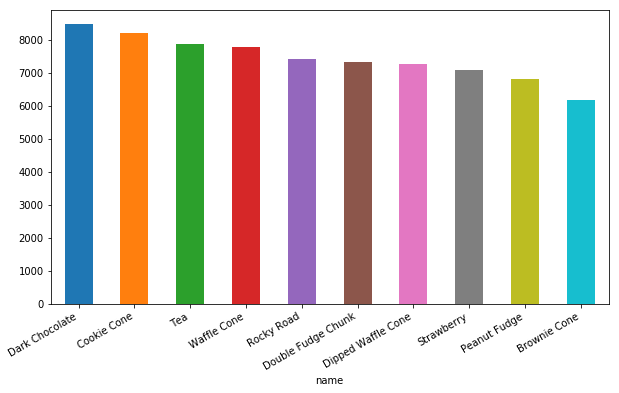

In [20]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()

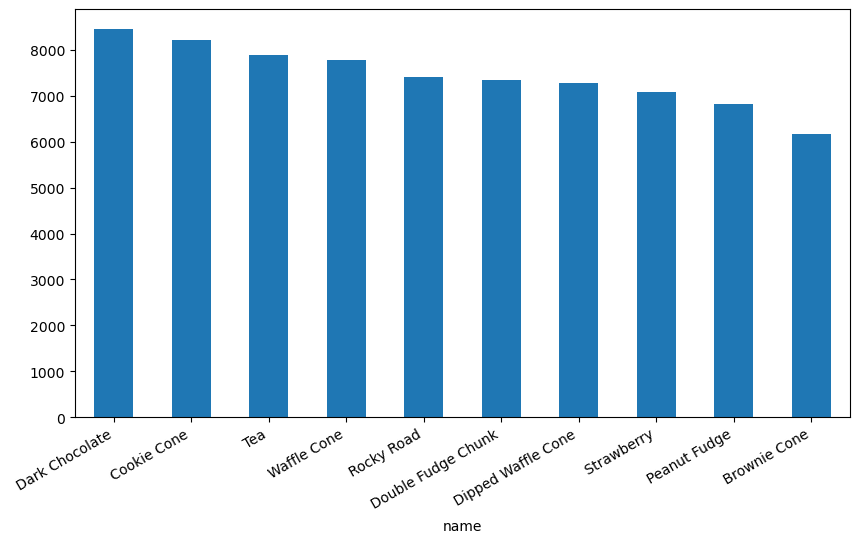

In [24]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()